# Step 1

In [1]:
# libraries: re for regular expressions and pandas for data manipulation. 
import re 
import pandas as pd

In [2]:
#reading with UTF-8
f = open('WhatsApp Chat with Osama.txt', 'r',encoding ='utf-8')

In [3]:
#You're reading the entire content of the file into the variable data. 
data =f.read()

In [4]:
print(data)

8/10/21, 11:47 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
8/10/21, 11:47 AM - Irfanul Kabir Hira: Hello
8/10/21, 11:48 AM - Irfanul Kabir Hira: Free hoe call dau mama
8/10/21, 7:29 PM - Osama: সরি বন্ধু
8/10/21, 7:29 PM - Osama: খেয়াল করিনাই
8/26/21, 1:31 AM - Osama: আসসালামু আলাইকুম বন্ধু
8/26/21, 1:31 AM - Osama: শুভ জন্মদিন 😊
8/26/21, 7:04 AM - Irfanul Kabir Hira: Walaikumassalam
8/26/21, 7:04 AM - Irfanul Kabir Hira: You deleted this message
8/26/21, 7:06 AM - Irfanul Kabir Hira: Kemne janos amr j aj k birthday?????
8/26/21, 7:07 AM - Irfanul Kabir Hira: Thank you so much my permanent buddy💥🌼..Lambi umar pau meri chikni dost🖖🖖..((Umn't any astrologer but honesty speaking,Um the luckiest person on this planet to have you as my friend 💞))..
8/26/21, 9:03 AM - Osama: না জানলে তোমার বন্ধু হলাম কেমনে!🧐
8/26/21, 9:03 AM - Osama: 🥰🥰🥰🥰😇😇😇
8/26/21, 9:24 AM - Irfanul Kabir Hira: 😘
11/15/21, 

# Step 2 ->Regular Expression 

In [5]:
# I will Copy from the Aboves Data list , Will copy any o the text " 8/10/21, 11:47 AM - Irfanul Kabir Hira: Hello"
#And then Past it on Chat-GPT for Creating the-->>[[ regular expression  ]]
pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}),\s(\d{1,2}:\d{2}\s?[APM]{2})\s-\s([^:]+):\s(.+)'


In [6]:
#Use re.findall to extract the messages:
messages = re.findall(pattern, data, re.MULTILINE)

In [7]:
parsed_data = []
for message in messages:
    parsed_data.append(message)

# Now, parsed_data contains the tuples of (date, time, sender, message)


In [8]:
# Directly assigning the list of tuples
parsed_data = messages 


In [9]:
# Create DataFrame
df = pd.DataFrame(parsed_data, columns=['Date', 'Time', 'Name', 'Message'])

In [10]:
# for showing top 5 Data Sets
df.head() 

,Date,Time,Name,Message
0,8/10/21,11:47 AM,Irfanul Kabir Hira,Hello
1,8/10/21,11:48 AM,Irfanul Kabir Hira,Free hoe call dau mama
2,8/10/21,7:29 PM,Osama,সরি বন্ধু
3,8/10/21,7:29 PM,Osama,খেয়াল করিনাই
4,8/26/21,1:31 AM,Osama,আসসালামু আলাইকুম বন্ধু


In [11]:
# For Showing Full Data Sets
df

,Date,Time,Name,Message
0,8/10/21,11:47 AM,Irfanul Kabir Hira,Hello
1,8/10/21,11:48 AM,Irfanul Kabir Hira,Free hoe call dau mama
2,8/10/21,7:29 PM,Osama,সরি বন্ধু
3,8/10/21,7:29 PM,Osama,খেয়াল করিনাই
4,8/26/21,1:31 AM,Osama,আসসালামু আলাইকুম বন্ধু
...,...,...,...,...
384,8/11/24,1:13 PM,Irfanul Kabir Hira,ekhn ektu hatajari jacci
385,8/11/24,1:13 PM,Irfanul Kabir Hira,ektu kaze
386,8/11/24,1:13 PM,Irfanul Kabir Hira,bhabir oi dike
387,8/11/24,1:14 PM,Irfanul Kabir Hira,tar jonno kal k jabo ei r ki


In [12]:
# To Show the Existing text
df.shape

(389, 4)

In [13]:
# Assuming df is your DataFrame and 'Date' column is in the format MM/DD/YY
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

In [14]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

In [15]:
# Extract the Month from the 'Date' column
df['Month']=df['Date'].dt.month_name()

In [16]:
# Extract the Year from the 'Date' column
df['Hour'] =df['Date'].dt.hour

In [17]:
df.head()

,Date,Time,Name,Message,Year,Month,Hour
0,2021-08-10,11:47 AM,Irfanul Kabir Hira,Hello,2021,August,0
1,2021-08-10,11:48 AM,Irfanul Kabir Hira,Free hoe call dau mama,2021,August,0
2,2021-08-10,7:29 PM,Osama,সরি বন্ধু,2021,August,0
3,2021-08-10,7:29 PM,Osama,খেয়াল করিনাই,2021,August,0
4,2021-08-26,1:31 AM,Osama,আসসালামু আলাইকুম বন্ধু,2021,August,0


# For Both person 

In [18]:
#Top Users , who sent the most text ever 
df['Name'].value_counts()

Name
Irfanul Kabir Hira    266
Osama                 123
Name: count, dtype: int64

In [19]:
#Top 5 users
x = df['Name'].value_counts().head()

In [20]:
# Ploting a graph
import matplotlib.pyplot as plt

In [21]:
name =x.index
count =x.values

<BarContainer object of 2 artists>

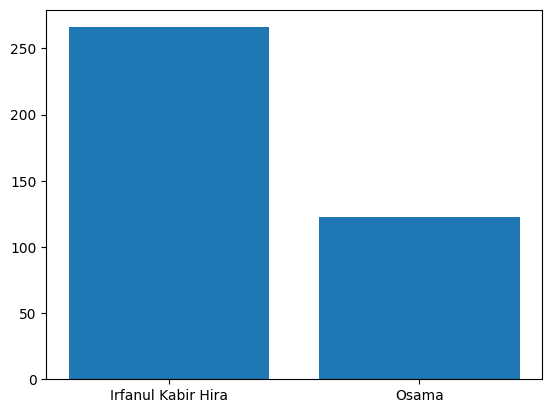

In [22]:
plt.bar(name,count)

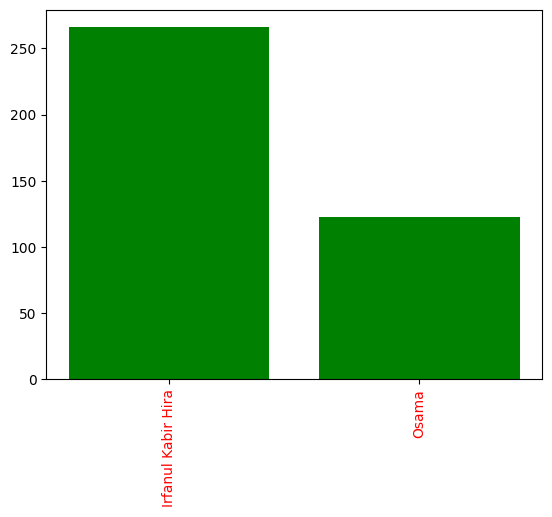

In [23]:
plt.bar(name,count,color ='green' )
plt.xticks(rotation='vertical' , color ='red')
plt.show()

In [24]:
# Each users Percantege of Messages

round((df['Name'].value_counts()/df.shape[0])*100,2)

Name
Irfanul Kabir Hira    68.38
Osama                 31.62
Name: count, dtype: float64

In [25]:
# Each users Percantege of Messages --> Reset kore Data fram e convert korlam 

round((df['Name'].value_counts()/df.shape[0])*100,2).reset_index()

,Name,count
0,Irfanul Kabir Hira,68.38
1,Osama,31.62


In [26]:
# Rename korbo 
round((df['Name'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns ={'Name':'Name of Messager' , 'count':'percent'})

,Name of Messager,percent
0,Irfanul Kabir Hira,68.38
1,Osama,31.62


# To show a particular Person Through Name 

In [27]:
df[df['Name'] == 'Irfanul Kabir Hira']

,Date,Time,Name,Message,Year,Month,Hour
0,2021-08-10,11:47 AM,Irfanul Kabir Hira,Hello,2021,August,0
1,2021-08-10,11:48 AM,Irfanul Kabir Hira,Free hoe call dau mama,2021,August,0
6,2021-08-26,7:04 AM,Irfanul Kabir Hira,Walaikumassalam,2021,August,0
7,2021-08-26,7:04 AM,Irfanul Kabir Hira,You deleted this message,2021,August,0
8,2021-08-26,7:06 AM,Irfanul Kabir Hira,Kemne janos amr j aj k birthday?????,2021,August,0
...,...,...,...,...,...,...,...
383,2024-08-11,1:13 PM,Irfanul Kabir Hira,kal k jabo,2024,August,0
384,2024-08-11,1:13 PM,Irfanul Kabir Hira,ekhn ektu hatajari jacci,2024,August,0
385,2024-08-11,1:13 PM,Irfanul Kabir Hira,ektu kaze,2024,August,0
386,2024-08-11,1:13 PM,Irfanul Kabir Hira,bhabir oi dike,2024,August,0


In [28]:
# To count the total Number of texts and Columns 
df[df['Name'] == 'Irfanul Kabir Hira'].shape

(266, 7)

# To Know the Total Number of Words

In [29]:
# total Number of words
for Message in df['Message']:
    print(Message)

Hello
Free hoe call dau mama
সরি বন্ধু
খেয়াল করিনাই
আসসালামু আলাইকুম বন্ধু
শুভ জন্মদিন 😊
Walaikumassalam
You deleted this message
Kemne janos amr j aj k birthday?????
Thank you so much my permanent buddy💥🌼..Lambi umar pau meri chikni dost🖖🖖..((Umn't any astrologer but honesty speaking,Um the luckiest person on this planet to have you as my friend 💞))..
না জানলে তোমার বন্ধু হলাম কেমনে!🧐
🥰🥰🥰🥰😇😇😇
😘
<Media omitted>
আলহামদুলিল্লাহ 🥰🥰
Khbr dice to k???
Oi din to WhatsApp a Alhamdulillah lillo
Ami bli
নক দিছে দুইটার এদিকে
Kire ki shukobor
Ita bollo janbi
Ai r ki🥰
ঘুম ছিলাম আমি
19-20 tarik apur bie boltece
Arghya to Dhakai??
Nah???
ইতা বাসায় বেডা
Ita brac e jai nai???
এখনো যায়নি তো,
Bondhu pic gula dau🤣🤣🤣
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
Baire tulci r gula koi😢
<Media omitted>
<Media omitte

In [30]:
#To Split the number Words
for Message in df['Message']:
    print(Message.split())

['Hello']
['Free', 'hoe', 'call', 'dau', 'mama']
['সরি', 'বন্ধু']
['খেয়াল', 'করিনাই']
['আসসালামু', 'আলাইকুম', 'বন্ধু']
['শুভ', 'জন্মদিন', '😊']
['Walaikumassalam']
['You', 'deleted', 'this', 'message']
['Kemne', 'janos', 'amr', 'j', 'aj', 'k', 'birthday?????']
['Thank', 'you', 'so', 'much', 'my', 'permanent', 'buddy💥🌼..Lambi', 'umar', 'pau', 'meri', 'chikni', "dost🖖🖖..((Umn't", 'any', 'astrologer', 'but', 'honesty', 'speaking,Um', 'the', 'luckiest', 'person', 'on', 'this', 'planet', 'to', 'have', 'you', 'as', 'my', 'friend', '💞))..']
['না', 'জানলে', 'তোমার', 'বন্ধু', 'হলাম', 'কেমনে!🧐']
['🥰🥰🥰🥰😇😇😇']
['😘']
['<Media', 'omitted>']
['আলহামদুলিল্লাহ', '🥰🥰']
['Khbr', 'dice', 'to', 'k???']
['Oi', 'din', 'to', 'WhatsApp', 'a', 'Alhamdulillah', 'lillo']
['Ami', 'bli']
['নক', 'দিছে', 'দুইটার', 'এদিকে']
['Kire', 'ki', 'shukobor']
['Ita', 'bollo', 'janbi']
['Ai', 'r', 'ki🥰']
['ঘুম', 'ছিলাম', 'আমি']
['19-20', 'tarik', 'apur', 'bie', 'boltece']
['Arghya', 'to', 'Dhakai??']
['Nah???']
['ইতা', 'বাসায়', '

In [31]:
# To Count Total Number of Words
words =[] # Declare a variable which should be initially Empty 
for Message in df['Message']:
    words.extend(Message.split())

In [32]:
# To know the Words count 
len(words)

1139

In [33]:
emoji_pattern = re.compile(
    r'['
    r'\U0001F600-\U0001F64F'  # Emoticons
    r'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
    r'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
    r'\U0001F700-\U0001F77F'  # Alchemical Symbols
    r'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
    r'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
    r'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
    r'\U0001FA00-\U0001FA6F'  # Chess Symbols, Symbols and Pictographs Extended-A
    r'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-B
    r'\U00002702-\U000027B0'  # Dingbats
    r'\U000024C2-\U0001F251'  # Enclosed characters
    r'\U0001F90D-\U0001F93A'  # Hearts and hand gestures
    r'\U0001F9B0-\U0001F9B9'  # People and body parts
    r'\U0001F9C0-\U0001F9C2'  # Food and drink
    r'\U0001F9D0-\U0001F9FF'  # Faces, people, and fantasy characters
    r']+'
)


In [34]:
# Function to count emojis in a message
def count_emojis(message):
    return len(emoji_pattern.findall(message))

# Apply the function to the 'Message' column and create a new column for emoji count
df['Emoji Count'] = df['Message'].apply(count_emojis)

# Group by 'Name' to get total emoji count per person
emoji_counts = df.groupby('Name')['Emoji Count'].sum().reset_index()

# Print the result
print(emoji_counts)

                 Name  Emoji Count
0  Irfanul Kabir Hira           24
1               Osama           12


In [79]:
import emoji
from collections import Counter
import pandas as pd

# Initialize the list to store emojis
emojis = []

# Extract emojis from each message
for Message in df['Message']:
    emojis.extend([c for c in Message if emoji.is_emoji(c)])

# Create a DataFrame with the emoji counts
emoji_counts_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))), columns=['Emoji', 'Count'])

# Display the DataFrame
print(emoji_counts_df)


   Emoji  Count
0      🤣     14
1      🥰      7
2      🙂      7
3      😑      5
4      🙃      5
5      😢      4
6      🥹      4
7      😇      3
8      😊      2
9      🖖      2
10     💞      2
11     🙄      2
12     😓      2
13     💥      1
14     🌼      1
15     🧐      1
16     😘      1
17     👀      1
18     💆      1
19     ♂      1
20     😮      1
21     😭      1


In [80]:
# Find the 5 most common emojis
top_5_emojis = emoji_counts_df.head(5)

# Display the top 5 most common emojis
print(top_5_emojis)


  Emoji  Count
0     🤣     14
1     🥰      7
2     🙂      7
3     😑      5
4     🙃      5


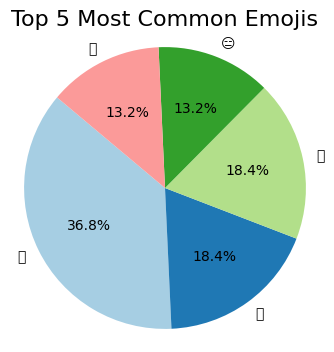

In [91]:
import matplotlib.pyplot as plt

# Find the 5 most common emojis
top_5_emojis = emoji_counts_df.head(5)

# Plot a pie chart
plt.figure(figsize=(4, 4))  # Size of the figure
plt.pie(
    top_5_emojis['Count'], 
    labels=top_5_emojis['Emoji'], 
    autopct='%1.1f%%',  # Show percentages # Without perchentage Symbol ->'%.2f'
    startangle=140,  # Start angle for the pie chart
    colors=plt.cm.Paired.colors  # Color palette
)
plt.title('Top 5 Most Common Emojis', fontsize=16)  # Add title
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


# No Worries i will Creat this emji pi using Chat GPT Help

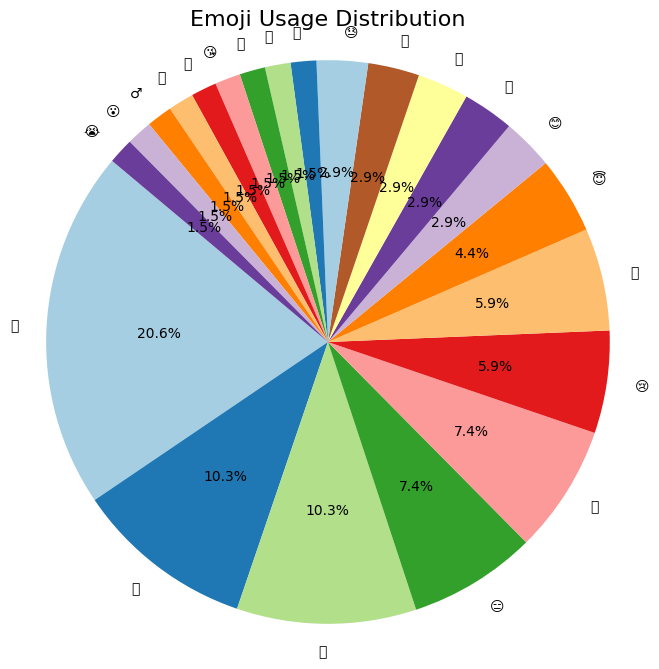

In [45]:

import matplotlib.pyplot as plt

# Data from the previous step (replace with your actual DataFrame)
emoji_counts_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))), columns=['Emoji', 'Count'])

# Plot a pie chart
plt.figure(figsize=(8, 8))  # Size of the figure
plt.pie(
    emoji_counts_df['Count'], 
    labels=emoji_counts_df['Emoji'], 
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Start angle for the pie chart
    colors=plt.cm.Paired.colors  # Color palette
)
plt.title('Emoji Usage Distribution', fontsize=16)  # Add title
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


# For Visualization of the Emoji Type 

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


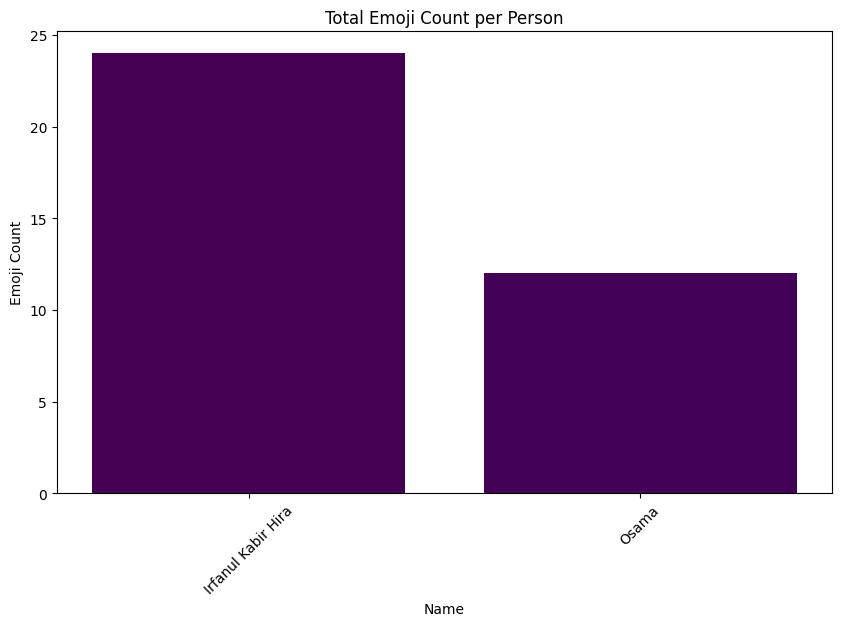

In [47]:
plt.figure(figsize=(10, 6))

# Get colors from the viridis palette
colors = plt.get_cmap('viridis')(range(len(emoji_counts)))

# Create a bar plot using matplotlib
plt.bar(emoji_counts['Name'], emoji_counts['Emoji Count'], color=colors)

plt.title('Total Emoji Count per Person')
plt.xlabel('Name')
plt.ylabel('Emoji Count')
plt.xticks(rotation=45)
plt.show()


# Time and Day , Which day most of the time Chats

In [48]:
# Creating a new Column 
df['month_num'] = df['Date'].dt.month

In [49]:
df

,Date,Time,Name,Message,Year,Month,Hour,Emoji Count,month_num
0,2021-08-10,11:47 AM,Irfanul Kabir Hira,Hello,2021,August,0,0,8
1,2021-08-10,11:48 AM,Irfanul Kabir Hira,Free hoe call dau mama,2021,August,0,0,8
2,2021-08-10,7:29 PM,Osama,সরি বন্ধু,2021,August,0,0,8
3,2021-08-10,7:29 PM,Osama,খেয়াল করিনাই,2021,August,0,0,8
4,2021-08-26,1:31 AM,Osama,আসসালামু আলাইকুম বন্ধু,2021,August,0,0,8
...,...,...,...,...,...,...,...,...,...
384,2024-08-11,1:13 PM,Irfanul Kabir Hira,ekhn ektu hatajari jacci,2024,August,0,0,8
385,2024-08-11,1:13 PM,Irfanul Kabir Hira,ektu kaze,2024,August,0,0,8
386,2024-08-11,1:13 PM,Irfanul Kabir Hira,bhabir oi dike,2024,August,0,0,8
387,2024-08-11,1:14 PM,Irfanul Kabir Hira,tar jonno kal k jabo ei r ki,2024,August,0,0,8


In [51]:
# Now i will Group By 
df.groupby(['Year','month_num']).count()['Message']

Year  month_num
2021  8             13
      11            55
2022  5             35
2023  3              1
      4             25
      10            32
2024  3              2
      4            144
      6             17
      7             42
      8             23
Name: Message, dtype: int64

In [60]:
#in formate of Data frame
# Now i will Group By 
timeline=df.groupby(['Year','month_num', 'Month']).count()['Message'].reset_index()

In [61]:
timeline

,Year,month_num,Month,Message
0,2021,8,August,13
1,2021,11,November,55
2,2022,5,May,35
3,2023,3,March,1
4,2023,4,April,25
5,2023,10,October,32
6,2024,3,March,2
7,2024,4,April,144
8,2024,6,June,17
9,2024,7,July,42


In [68]:
# Now i will merge the Year and Month columns

for i in range(timeline.shape[0]):
    print(timeline['Month'][i] + "-" + str(timeline['Year'][i]))

August-2021
November-2021
May-2022
March-2023
April-2023
October-2023
March-2024
April-2024
June-2024
July-2024
August-2024


In [71]:
# Now i will merge the Year and Month columns
time =[]
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i] + "-" + str(timeline['Year'][i]))

In [72]:
time

['August-2021',
 'November-2021',
 'May-2022',
 'March-2023',
 'April-2023',
 'October-2023',
 'March-2024',
 'April-2024',
 'June-2024',
 'July-2024',
 'August-2024']

In [73]:
timeline['time']=time

In [74]:
timeline

,Year,month_num,Month,Message,time
0,2021,8,August,13,August-2021
1,2021,11,November,55,November-2021
2,2022,5,May,35,May-2022
3,2023,3,March,1,March-2023
4,2023,4,April,25,April-2023
5,2023,10,October,32,October-2023
6,2024,3,March,2,March-2024
7,2024,4,April,144,April-2024
8,2024,6,June,17,June-2024
9,2024,7,July,42,July-2024


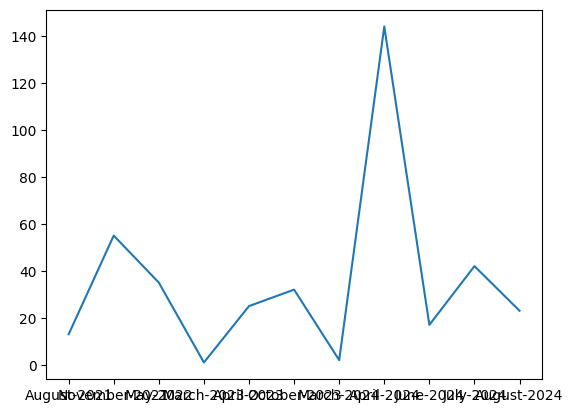

In [75]:
plt.plot(timeline['time'], timeline['Message'])


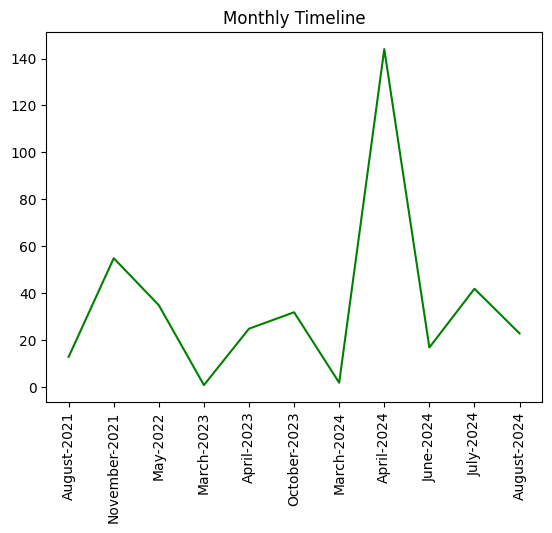

In [92]:
plt.plot(timeline['time'], timeline['Message'] , color = 'green')
plt.xticks(rotation='vertical')
plt.title("Monthly Timeline")
plt.show()

# Daily Timeline

In [93]:
df['Date']

0     2021-08-10
1     2021-08-10
2     2021-08-10
3     2021-08-10
4     2021-08-26
         ...    
384   2024-08-11
385   2024-08-11
386   2024-08-11
387   2024-08-11
388   2024-08-26
Name: Date, Length: 389, dtype: datetime64[ns]

In [98]:
# From the Above Column i will Extrect the Date
df['Only_Date'] = df['Date'].dt.date

In [99]:
#Group by and Couting the it according to each day
df.groupby ('Only_Date').count()['Message'] 

Only_Date
2021-08-10     4
2021-08-26     9
2021-11-15    15
2021-11-17     1
2021-11-20    26
2021-11-21     2
2021-11-28    11
2022-05-20    35
2023-03-05     1
2023-04-17    22
2023-04-24     3
2023-10-14    15
2023-10-15    17
2024-03-30     2
2024-04-04     8
2024-04-09    11
2024-04-10     1
2024-04-11     2
2024-04-12     6
2024-04-13     1
2024-04-14     9
2024-04-15    47
2024-04-17    40
2024-04-18    19
2024-06-15    17
2024-07-17    38
2024-07-18     4
2024-08-07     3
2024-08-08     1
2024-08-10     2
2024-08-11    16
2024-08-26     1
Name: Message, dtype: int64

In [100]:
# To find the Date sets in Table
df.groupby ('Only_Date').count()['Message'].reset_index()

,Only_Date,Message
0,2021-08-10,4
1,2021-08-26,9
2,2021-11-15,15
3,2021-11-17,1
4,2021-11-20,26
5,2021-11-21,2
6,2021-11-28,11
7,2022-05-20,35
8,2023-03-05,1
9,2023-04-17,22


In [101]:
daily_timeline=df.groupby ('Only_Date').count()['Message'].reset_index()

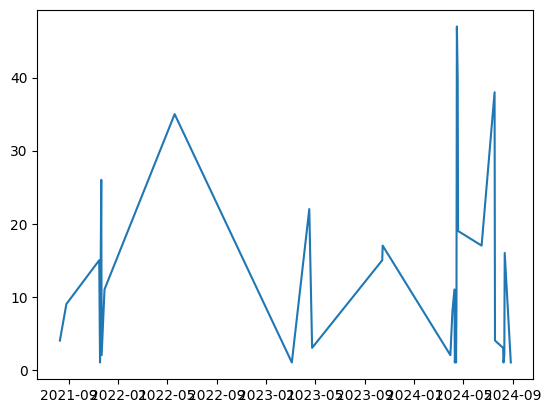

In [103]:
plt.plot(daily_timeline['Only_Date'], daily_timeline['Message'])

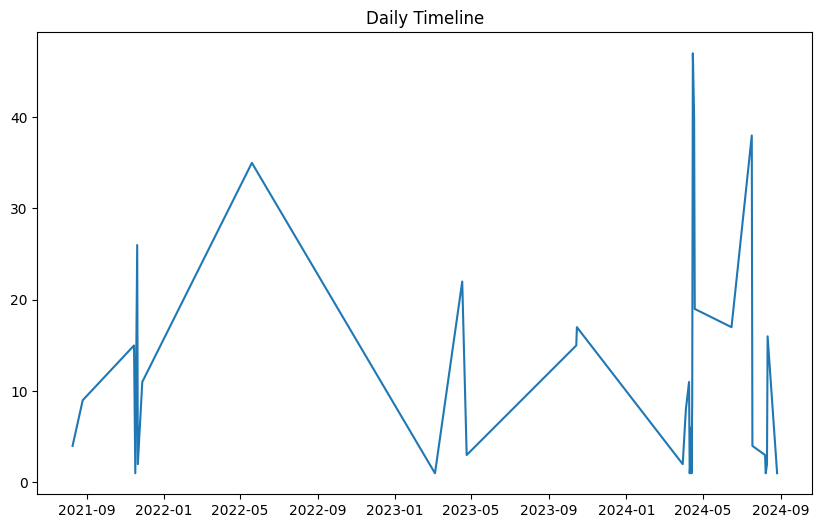

In [112]:
# To show this more organised
plt.figure(figsize=(10,6))
plt.plot(daily_timeline['Only_Date'], daily_timeline['Message'])
plt.title("Daily Timeline")
plt.show()

# According to Dates Which week we talk a lot OR same as according to month as well

In [113]:
df.head()

,Date,Time,Name,Message,Year,Month,Hour,Emoji Count,month_num,Only_Date
0,2021-08-10,11:47 AM,Irfanul Kabir Hira,Hello,2021,August,0,0,8,2021-08-10
1,2021-08-10,11:48 AM,Irfanul Kabir Hira,Free hoe call dau mama,2021,August,0,0,8,2021-08-10
2,2021-08-10,7:29 PM,Osama,সরি বন্ধু,2021,August,0,0,8,2021-08-10
3,2021-08-10,7:29 PM,Osama,খেয়াল করিনাই,2021,August,0,0,8,2021-08-10
4,2021-08-26,1:31 AM,Osama,আসসালামু আলাইকুম বন্ধু,2021,August,0,0,8,2021-08-26


In [114]:
df['Date'].dt.day_name()

0       Tuesday
1       Tuesday
2       Tuesday
3       Tuesday
4      Thursday
         ...   
384      Sunday
385      Sunday
386      Sunday
387      Sunday
388      Monday
Name: Date, Length: 389, dtype: object

In [115]:
df['day_name'] = df['Date'].dt.day_name()

In [117]:
df['day_name'].value_counts()

day_name
Monday       88
Wednesday    83
Saturday     63
Sunday       56
Thursday     43
Friday       41
Tuesday      15
Name: count, dtype: int64

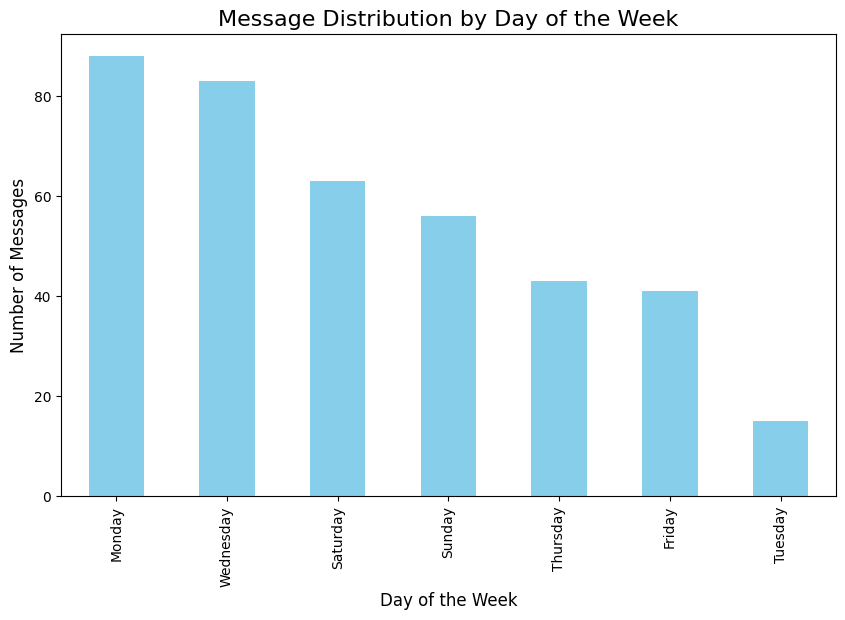

In [118]:
import matplotlib.pyplot as plt

# Plot the day_name counts as a bar graph
plt.figure(figsize=(10, 6))  # Size of the figure
df['day_name'].value_counts().plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Message Distribution by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)

# Display the plot
plt.show()


# Hit map 

# this will say , which Week the user actives most or less

In [119]:
df.head() # In hour Data Fram -> From Hour cloumn we make a new column name period

,Date,Time,Name,Message,Year,Month,Hour,Emoji Count,month_num,Only_Date,day_name
0,2021-08-10,11:47 AM,Irfanul Kabir Hira,Hello,2021,August,0,0,8,2021-08-10,Tuesday
1,2021-08-10,11:48 AM,Irfanul Kabir Hira,Free hoe call dau mama,2021,August,0,0,8,2021-08-10,Tuesday
2,2021-08-10,7:29 PM,Osama,সরি বন্ধু,2021,August,0,0,8,2021-08-10,Tuesday
3,2021-08-10,7:29 PM,Osama,খেয়াল করিনাই,2021,August,0,0,8,2021-08-10,Tuesday
4,2021-08-26,1:31 AM,Osama,আসসালামু আলাইকুম বন্ধু,2021,August,0,0,8,2021-08-26,Thursday


In [122]:
# So Creating new Column name --> Period 
period = []
for Hour in df[['day_name','Hour']]['Hour']:
    if Hour == 23:
        period.append(str(Hour) + "_" + str('00'))
    elif Hour == 0:
        period.append(str('00') + "_" + str(Hour+1))
    else:
        period.append(str(Hour) + "_" + str(Hour+1))
    

In [123]:
df['period'] =period

In [124]:
df.sample(5)

,Date,Time,Name,Message,Year,Month,Hour,Emoji Count,month_num,Only_Date,day_name,period
130,2023-10-14,10:24 PM,Irfanul Kabir Hira,<Media omitted>,2023,October,0,0,10,2023-10-14,Saturday,00_1
115,2023-04-17,3:16 PM,Irfanul Kabir Hira,???,2023,April,0,0,4,2023-04-17,Monday,00_1
178,2024-04-09,10:45 PM,Irfanul Kabir Hira,Kon Hospital jani dosto,2024,April,0,0,4,2024-04-09,Tuesday,00_1
353,2024-07-17,7:45 PM,Irfanul Kabir Hira,Allah amk goto kal bacaice,2024,July,0,0,7,2024-07-17,Wednesday,00_1
145,2023-10-15,2:35 PM,Irfanul Kabir Hira,<Media omitted>,2023,October,0,0,10,2023-10-15,Sunday,00_1


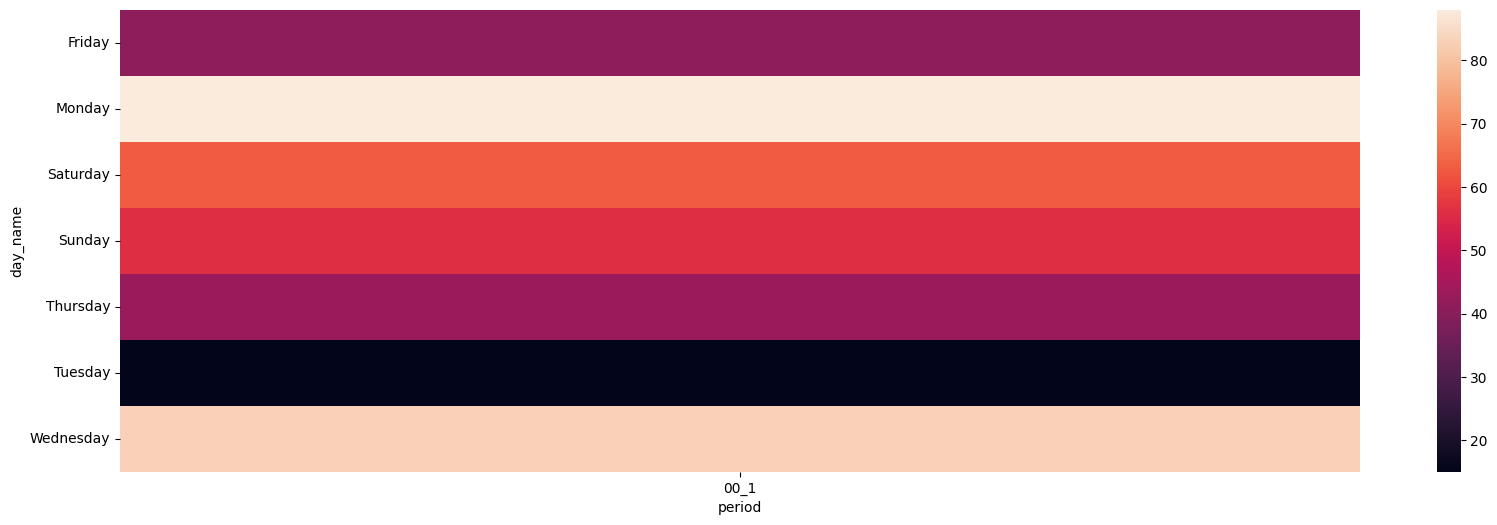

In [125]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='Message',aggfunc='count').fillna(0))
plt.yticks(rotation ='horizontal')
plt.show()

# Counting the Most Sending Words or uses Words 

In [138]:
# ALL the Words 
words=[]
for Message in df['Message']:
    print (Message)

Hello
Free hoe call dau mama
সরি বন্ধু
খেয়াল করিনাই
আসসালামু আলাইকুম বন্ধু
শুভ জন্মদিন 😊
Walaikumassalam
You deleted this message
Kemne janos amr j aj k birthday?????
Thank you so much my permanent buddy💥🌼..Lambi umar pau meri chikni dost🖖🖖..((Umn't any astrologer but honesty speaking,Um the luckiest person on this planet to have you as my friend 💞))..
না জানলে তোমার বন্ধু হলাম কেমনে!🧐
🥰🥰🥰🥰😇😇😇
😘
<Media omitted>
আলহামদুলিল্লাহ 🥰🥰
Khbr dice to k???
Oi din to WhatsApp a Alhamdulillah lillo
Ami bli
নক দিছে দুইটার এদিকে
Kire ki shukobor
Ita bollo janbi
Ai r ki🥰
ঘুম ছিলাম আমি
19-20 tarik apur bie boltece
Arghya to Dhakai??
Nah???
ইতা বাসায় বেডা
Ita brac e jai nai???
এখনো যায়নি তো,
Bondhu pic gula dau🤣🤣🤣
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
<Media omitted>
Baire tulci r gula koi😢
<Media omitted>
<Media omitte

In [139]:
 #Spliding the Words
words=[]
for Message in df['Message']:
    print (Message.split())

['Hello']
['Free', 'hoe', 'call', 'dau', 'mama']
['সরি', 'বন্ধু']
['খেয়াল', 'করিনাই']
['আসসালামু', 'আলাইকুম', 'বন্ধু']
['শুভ', 'জন্মদিন', '😊']
['Walaikumassalam']
['You', 'deleted', 'this', 'message']
['Kemne', 'janos', 'amr', 'j', 'aj', 'k', 'birthday?????']
['Thank', 'you', 'so', 'much', 'my', 'permanent', 'buddy💥🌼..Lambi', 'umar', 'pau', 'meri', 'chikni', "dost🖖🖖..((Umn't", 'any', 'astrologer', 'but', 'honesty', 'speaking,Um', 'the', 'luckiest', 'person', 'on', 'this', 'planet', 'to', 'have', 'you', 'as', 'my', 'friend', '💞))..']
['না', 'জানলে', 'তোমার', 'বন্ধু', 'হলাম', 'কেমনে!🧐']
['🥰🥰🥰🥰😇😇😇']
['😘']
['<Media', 'omitted>']
['আলহামদুলিল্লাহ', '🥰🥰']
['Khbr', 'dice', 'to', 'k???']
['Oi', 'din', 'to', 'WhatsApp', 'a', 'Alhamdulillah', 'lillo']
['Ami', 'bli']
['নক', 'দিছে', 'দুইটার', 'এদিকে']
['Kire', 'ki', 'shukobor']
['Ita', 'bollo', 'janbi']
['Ai', 'r', 'ki🥰']
['ঘুম', 'ছিলাম', 'আমি']
['19-20', 'tarik', 'apur', 'bie', 'boltece']
['Arghya', 'to', 'Dhakai??']
['Nah???']
['ইতা', 'বাসায়', '

In [140]:
# Extend Each Words uses the chat box
words=[]
for Message in df['Message']:
    words.extend(Message.split())
    

In [141]:
words

['Hello',
 'Free',
 'hoe',
 'call',
 'dau',
 'mama',
 'সরি',
 'বন্ধু',
 'খেয়াল',
 'করিনাই',
 'আসসালামু',
 'আলাইকুম',
 'বন্ধু',
 'শুভ',
 'জন্মদিন',
 '😊',
 'Walaikumassalam',
 'You',
 'deleted',
 'this',
 'message',
 'Kemne',
 'janos',
 'amr',
 'j',
 'aj',
 'k',
 'birthday?????',
 'Thank',
 'you',
 'so',
 'much',
 'my',
 'permanent',
 'buddy💥🌼..Lambi',
 'umar',
 'pau',
 'meri',
 'chikni',
 "dost🖖🖖..((Umn't",
 'any',
 'astrologer',
 'but',
 'honesty',
 'speaking,Um',
 'the',
 'luckiest',
 'person',
 'on',
 'this',
 'planet',
 'to',
 'have',
 'you',
 'as',
 'my',
 'friend',
 '💞))..',
 'না',
 'জানলে',
 'তোমার',
 'বন্ধু',
 'হলাম',
 'কেমনে!🧐',
 '🥰🥰🥰🥰😇😇😇',
 '😘',
 '<Media',
 'omitted>',
 'আলহামদুলিল্লাহ',
 '🥰🥰',
 'Khbr',
 'dice',
 'to',
 'k???',
 'Oi',
 'din',
 'to',
 'WhatsApp',
 'a',
 'Alhamdulillah',
 'lillo',
 'Ami',
 'bli',
 'নক',
 'দিছে',
 'দুইটার',
 'এদিকে',
 'Kire',
 'ki',
 'shukobor',
 'Ita',
 'bollo',
 'janbi',
 'Ai',
 'r',
 'ki🥰',
 'ঘুম',
 'ছিলাম',
 'আমি',
 '19-20',
 'tarik',
 'apur'

In [142]:
# Each words number of times use
from collections import Counter
Counter(words)

Counter({'<Media': 133,
         'omitted>': 133,
         'null': 18,
         'k': 16,
         'ki': 13,
         'বন্ধু': 11,
         'to': 11,
         'e': 11,
         'Bondhu': 8,
         'r': 7,
         'kore': 7,
         'nai': 7,
         'dike': 7,
         'jabo': 7,
         'amr': 6,
         'Ami': 6,
         'ta': 6,
         'Okay': 6,
         'ami': 6,
         'Ki': 5,
         'er': 5,
         'Aj': 5,
         'ei': 5,
         'na': 5,
         'kal': 5,
         'this': 4,
         'j': 4,
         'আমি': 4,
         'gula': 4,
         'দিতে': 4,
         'করে': 4,
         'bondhu': 4,
         'কি': 4,
         'dibo': 4,
         'ektu': 4,
         'call': 3,
         'আসসালামু': 3,
         'আলাইকুম': 3,
         'You': 3,
         'deleted': 3,
         'message': 3,
         'aj': 3,
         'আলহামদুলিল্লাহ': 3,
         'Alhamdulillah': 3,
         'Tui': 3,
         'নির্বাচন': 3,
         'allah': 3,
         'obosta': 3,
         'তো': 3,
   

In [143]:
# Most Common 2o Words

from collections import Counter
Counter(words).most_common(20)

[('<Media', 133),
 ('omitted>', 133),
 ('null', 18),
 ('k', 16),
 ('ki', 13),
 ('বন্ধু', 11),
 ('to', 11),
 ('e', 11),
 ('Bondhu', 8),
 ('r', 7),
 ('kore', 7),
 ('nai', 7),
 ('dike', 7),
 ('jabo', 7),
 ('amr', 6),
 ('Ami', 6),
 ('ta', 6),
 ('Okay', 6),
 ('ami', 6),
 ('Ki', 5)]

In [144]:
# Converting this into a Data fram 

from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<Media,133
1,omitted>,133
2,null,18
3,k,16
4,ki,13
5,বন্ধু,11
6,to,11
7,e,11
8,Bondhu,8
9,r,7


In [157]:
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords


In [161]:
temp=temp[temp['Message']!='<Media omitted>\n']

NameError: name 'temp' is not defined

In [162]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()


In [163]:
words= []
for Message in temp['Message']:
    for word in Message.lower().split():
        if word not in stop_words:
            words.append(word)


NameError: name 'temp' is not defined

In [160]:
# Converting this into a Data fram 
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,,750
1,<,133
2,>,133
3,া,126
4,ে,82
5,ি,72
6,ন,60
7,র,59
8,ল,55
9,ক,55


# To Find All the Link that has been Shared 

In [70]:
from urlextract import URLExtract # To install this "pip install urlextract"
extractor = URLExtract()
urls = extractor.find_urls("Let's Find the URLS https://github.com/irfanulkabirhira, https://www.linkedin.com/in/md-irfanul-kabir-hira-356518279/")
# Print the extracted URLs
print(urls)

['https://github.com/irfanulkabirhira,', 'https://www.linkedin.com/in/md-irfanul-kabir-hira-356518279/']


In [73]:
#To print the Url epmty link , it means in this message there will be No Links
links = []
for Message in df['Message']:
    print(extractor.find_urls(Message))


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [75]:
#All the links
links = []
for Message in df['Message']:
    links.extend(extractor.find_urls(Message))

In [79]:
(links)

['https://youtu.be/Kz-aYLKy3sU?si=grGrXN309ZuNxbp6']

In [83]:
#The Number off Links 
links = []
for Message in df['Message']:
    links.extend(extractor.find_urls(Message))


In [84]:
len(links)

1

# Now , Find Who is that Specific person !!

In [87]:
from urlextract import URLExtract
import pandas as pd

# Initialize the URLExtractor
extractor = URLExtract()

# Create a list to store tuples of (Sender, Link)
links_with_senders = []

# Extract links along with the sender's name
for _, row in df.iterrows():
    links = extractor.find_urls(row['Message'])
    for link in links:
        links_with_senders.append((row['Name'], link))

# Convert to DataFrame for easier analysis
links_df = pd.DataFrame(links_with_senders, columns=['Sender', 'Link'])

# Count the number of links sent by each person
link_counts = links_df['Sender'].value_counts().reset_index()
link_counts.columns = ['Sender', 'Number of Links']

# Print the results
print(link_counts)

               Sender  Number of Links
0  Irfanul Kabir Hira                1


In [91]:
from urlextract import URLExtract
import pandas as pd

# Initialize the URLExtractor
extractor = URLExtract()

# Extract links along with the sender's name
links_with_senders = [
    (row['Name'], link) 
    for _, row in df.iterrows() 
    for link in extractor.find_urls(row['Message'])
]

# Convert to DataFrame for easier analysis
links_df = pd.DataFrame(links_with_senders, columns=['Sender', 'Link'])

# Group by 'Sender' and aggregate links
link_counts = (
    links_df.groupby('Sender')
    .agg({
        'Link': ['count', list]  # Count and aggregate links into a list
    })
    .reset_index()
)

# Flatten the MultiIndex columns
link_counts.columns = ['Sender', 'Number of Links', 'Links']

# Print the results
print(link_counts)


               Sender  Number of Links  \
0  Irfanul Kabir Hira                1   

                                               Links  
0  [https://youtu.be/Kz-aYLKy3sU?si=grGrXN309ZuNx...  


# Word Cloud

In [ ]:
# TO install this cmd --> pip install wordcloud ===> then the word cloud Librabray will be installed 

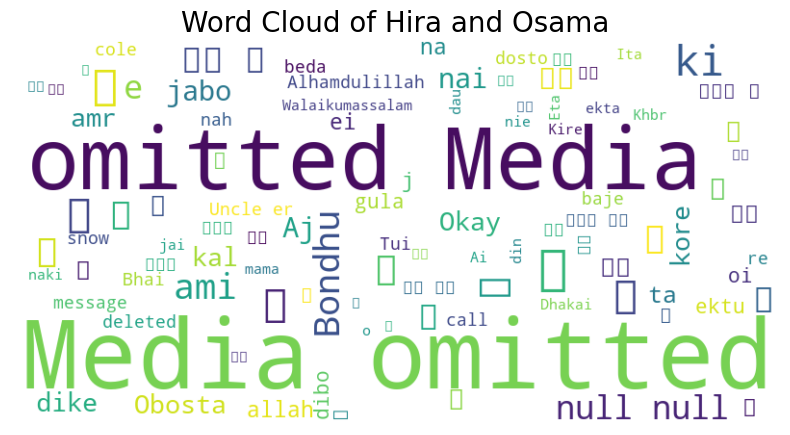

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words from the chatbox into a single string
text = ' '.join(words)

# Generate and display the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    max_font_size=100, 
    max_words=100, 
    background_color='white',
    colormap='viridis'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Hira and Osama', fontsize=20)  # Add title with a specified font size
plt.axis('off')
plt.show()
